In [289]:
# import dependencies

import numpy as np
import numpy.matlib 
import matplotlib.pyplot as plt
import os
import math

import pandas as pd

%matplotlib inline
from numpy.fft import fft, ifft

from numpy.random import default_rng

In [290]:
# Calculating a hopf bifurcation with noise
# coupled and uncoupled ENSO and PDO

## Time Variables
dt = 0.1
stopt = 1000
nt = int(stopt/dt)

##Set-up Noise as dW
dW = numpy.random.default_rng().uniform(-2, 2, [2, nt-1])

<b>Polar Coordinates:</b>


dr/dt = lambda$*$r - mu$*$r^3<br>
dtheta/dt = omega

<b>Cartesian Coordinates:</b>


dx/dt = lambda$*$x - omega$*$y - mu$*x*$(x^2+y^2)<br>
dy/dt = lambda$*$y + omega$*$x - mu$*y*$(x^2+y^2)

    where mu controls criticality of case (mu=1 - supercritical)

<b>ENSO Variables</b>


lambdae - self coupling strength/ damping <br>
omegae - frequency of ENSO<br>
sigmane - amplitude of noise added to ENSO<br>
sigmape - coupling strength of PDO to ENSO
<br>

<b>PDO Variables</b>

PDO variables<br>
lambdap - relaxation time<br>
omegap - frequency of PDO<br>
sigmanp - amplitude of noise added to PDO<br>
sigmaep - coupling strength of ENSO to PDO

In [1208]:
#Initial Variables

lambdae = 0.1
omegae = (2*np.pi)/4
noisee = 0.05
sigmape = 0.1
lambdap = 0.2
omegap = (2*np.pi)/60
noisep = 0.1
sigmaep = 0.01

## Time Variables
dt = 0.1
stopt = 1000
nt = int(stopt/dt)


##check if inherent timescales exist

if omegae == 0:
    ite = 0
    lamdae = 0
else:
    ite = 1

if omegap == 0:
    itp = 0
    lambdap = 0
else:
    itp=1

In [1209]:
##Initialise Matrices

xe = np.zeros( (2,nt) )
dxe = np.zeros( (1,2) )
r2e = np.zeros( (1, nt) )
xp = np.zeros( (2, nt) )
dxp = np.zeros( (1,2) )
r2p = np.zeros( (1, nt) )

In [1210]:
## Initialise Conditions
xe[0][0] = 0.01
xe[1][0] = 0
r2e[0][0] = (xe[0][0]*xe[0][0] + xe[1][0]*xe[1][0])

xp[0][0] = 0.01
xp[1][0] = 0
r2p[0][0] = (xp[0][0]*xp[0][0] + xp[1][0]*xp[1][0])

In [1211]:
for ii in range(1, nt):

## ENSO
    dxe[0][0] = lambdae*xe[0][ii-1] - omegae*xe[1][ii-1] - ite*xe[0][ii-1]*r2e[0][ii-1]
    dxe[0][1] = lambdae*xe[1][ii-1] + omegae*xe[0][ii-1] - ite*xe[1][ii-1]*r2e[0][ii-1]
    xe[:,ii] = xe[:,ii-1] + dxe[:]*dt + sigmape*xp[:,ii-1] + noisee*dW[:,ii-1]
    r2e[0][ii] = (xe[0][ii]*xe[0][ii]) + (xe[1][ii]*xe[1][ii])

## IPO
    dxp[0][0] = lambdap*xp[0][ii-1] - omegap*xp[1][ii-1] - itp*xp[0][ii-1]*r2p[0][ii-1]
    dxp[0][1] = lambdap*xp[1][ii-1] + omegap*xp[0][ii-1] - itp*xp[1][ii-1]*r2p[0][ii-1]
    xp[:,ii] = xp[:,ii-1] + dxp[:]*dt + sigmaep*xe[:,ii-1] + noisep*dW[:,ii-1]
    r2p[0][ii] = (xp[0][ii]*xp[0][ii]) + (xp[1][ii]*xp[1][ii])


(800.0, 999.9000000000001)

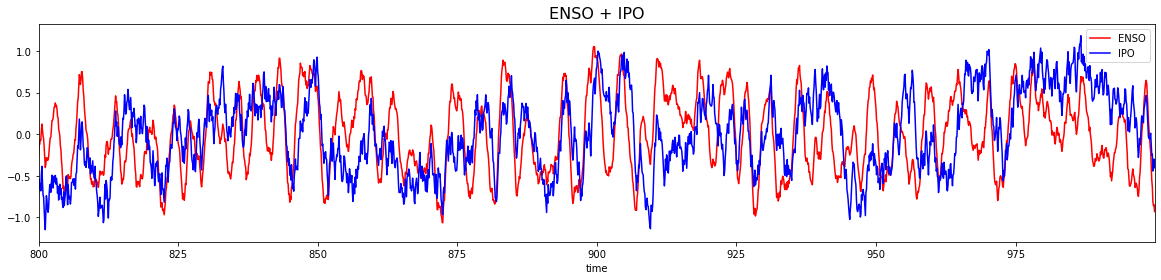

In [1212]:
## Plot ENSO and IPO over time

taxis = np.arange(0, nt*dt, dt)
tend = (stopt - 200)


plt.figure(figsize=(20,4), facecolor='white')
plt.plot(taxis, xe[0], '-r', label='ENSO')
plt.plot(taxis, xp[0], '-b', label='IPO')
plt.xlabel('time')
plt.legend()
plt.title('ENSO + IPO', fontsize='16')
plt.xlim(tend, taxis[-1])

In [1213]:
##Calculaltions of Spectra using FFT

#ENSO
ye = fft(xe[0,:])
qe = len(ye)
pe = np.array(qe)

powere = np.power((ye[0:math.floor(pe/2)]), 2)
nyquist = 1/(dt*2)
freqe = nyquist*np.linspace(0,1,int(pe/2))
periode = 1/(freqe)


#PDO
yp = fft(xp[0,:])
qp = len(yp)
pp = np.array(qp)

powerp = np.power((yp[0:math.floor(pp/2)]), 2)
nyquist = 1/(dt*2)
freqa = nyquist*np.linspace(0,1,int(pp/2))
periodp = 1/(freqa)

C:\Users\nym\AppData\Local\Temp/ipykernel_8128/2556431473.py:11: RuntimeWarning: divide by zero encountered in true_divide
  periode = 1/(freqe)
C:\Users\nym\AppData\Local\Temp/ipykernel_8128/2556431473.py:22: RuntimeWarning: divide by zero encountered in true_divide
  periodp = 1/(freqa)


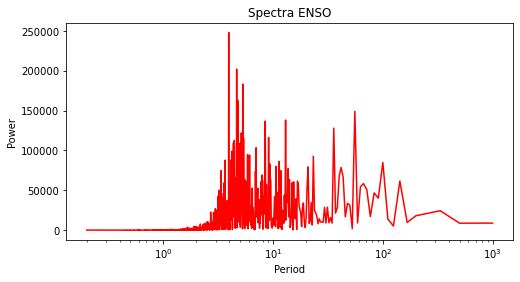

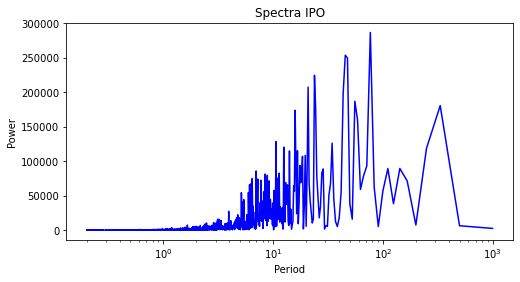

In [1214]:
##Plot Spectra

plt.subplots(figsize=(8,4), facecolor='white')
plt.title('Spectra ENSO')
plt.semilogx(periode, np.abs(powere), 'r')
plt.xlabel('Period')
plt.ylabel('Power')
plt.grid
plt.show()

plt.subplots(figsize=(8,4), facecolor='white')
plt.title('Spectra IPO')
plt.semilogx(periodp, np.abs(powerp), 'b')
plt.xlabel('Period')
plt.ylabel('Power')
plt.grid
plt.show()

             t       t+1       t+5      t+15
t     1.000000  0.281659  0.044298  0.002064
t+1   0.281659  1.000000  0.760622  0.681097
t+5   0.044298  0.760622  1.000000  0.956579
t+15  0.002064  0.681097  0.956579  1.000000


,0
count,10000.000000
mean,0.453657
std,0.282045
min,0.000031
25%,0.227291
50%,0.427319
75%,0.647923
max,1.479046


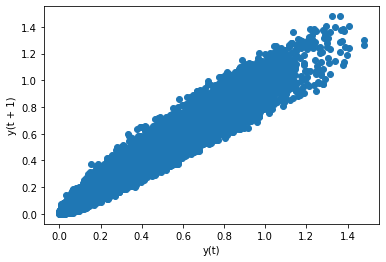

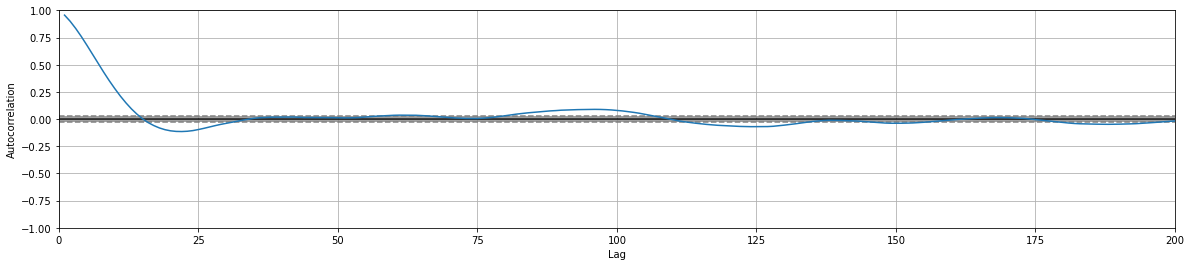

In [1215]:
##Create data frames of model data and compute correlations
modele = pd.DataFrame(r2e[0])

#as lagplot
pd.plotting.lag_plot(modele, lag=1)

#as autocorrelation matrix
mec = pd.concat([modele.shift(15), modele.shift(5),
                       modele.shift(1), modele], axis=1)
mec.columns = ['t', 't+1', 't+5', 't+15']
corre = mec.corr()
 
print(corre)

#as pandas plot
plt.subplots(figsize=(20,4))
e = pd.plotting.autocorrelation_plot(modele)
e.plot()
plt.xlim(0, 200)

#print first order stats
modele.describe()


             t       t+1       t+5      t+15
t     1.000000  0.281659  0.044298  0.002064
t+1   0.281659  1.000000  0.760622  0.681097
t+5   0.044298  0.760622  1.000000  0.956579
t+15  0.002064  0.681097  0.956579  1.000000


,0
count,10000.000000
mean,0.385281
std,0.277898
min,0.000012
25%,0.163533
50%,0.331369
75%,0.554288
max,1.624983


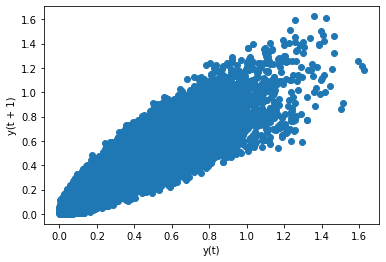

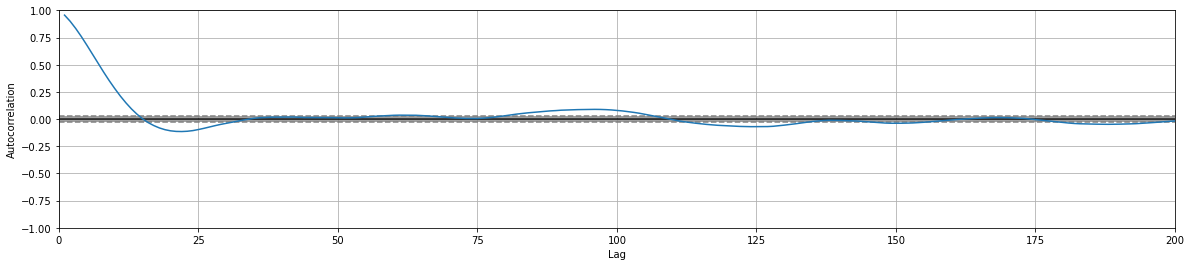

In [1216]:
##Create data frames of model data and compute correlations for IPO
modelp = pd.DataFrame(r2p[0])

#as lagplot
pd.plotting.lag_plot(modelp, lag=1)

#as autocorrelation matrix
mpc = pd.concat([modelp.shift(15), modelp.shift(5),
                       modelp.shift(1), modelp], axis=1)
mpc.columns = ['t', 't+1', 't+5', 't+15']
corrp = mec.corr()
 
print(corrp)

#as pandas plot
plt.subplots(figsize=(20,4))
p = pd.plotting.autocorrelation_plot(modele)
p.plot()
plt.xlim(0, 200)

#print first order stats
modelp.describe()

In [1217]:
## Calculate composites

# Positive ENSO, positive IPO
pe_pi = 0
for ii in range (0, nt-1):
    if xe[0, ii] >= (np.std(xe[0]) + np.mean(xe[0])): continue
    elif xp[0, ii] >= (np.std(xp[0]) + np.mean(xp[0])):
            pe_pi += 1
print(pe_pi)

# Positive ENSO, negative IPO
pe_ni = 0
for ii in range (0, nt-1):
    if xe[0, ii] >= (np.std(xe[0]) + np.mean(xe[0])): continue
    elif xp[0, ii] <= (np.mean(xp[0]) - np.std(xp[0])):
            pe_ni += 1
print(pe_ni)

# Negative ENSO, positive IPO
ne_pi = 0
for ii in range (0, nt-1):
    if xe[0, ii] <= (np.mean(xe[0]) - np.std(xe[0])): continue
    elif xp[0, ii] >= (np.std(xp[0]) + np.mean(xp[0])):
        ne_pi += 1
print(ne_pi)


# Negative ENSO, negative IPO
ne_ni = 0
for ii in range (0, nt-1):
    if xe[0, ii] <= (np.mean(xe[0]) - np.std(xe[0])): continue
    elif xp[0, ii] <= (np.mean(xp[0]) - np.std(xp[0])):
        ne_ni += 1
print(ne_ni)


1224
1829
1821
1147


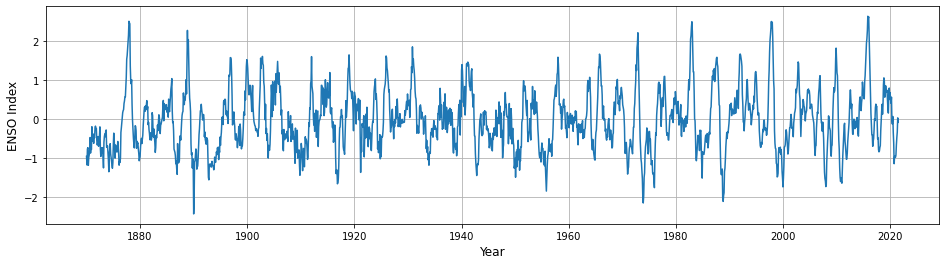

In [13]:
## Import and Plot enso data from WMO

enso_data = 'ihadisst1_nino34a.dat.txt'
ENSO = np.genfromtxt(enso_data, missing_values=' ')

datae = pd.DataFrame(ENSO)
datae.columns = ['T', 'ENSO']
datae = datae.set_index('T')

plt.subplots(figsize=(16,4), facecolor='white')
plt.plot(datae.index, datae.ENSO)
plt.xlabel('Year',fontsize=12)
plt.ylabel('ENSO Index',fontsize=12)
plt.grid()

C:\Users\nym\AppData\Local\Temp/ipykernel_8128/1020186562.py:10: RuntimeWarning: divide by zero encountered in true_divide
  periodo = 1/(freqo)


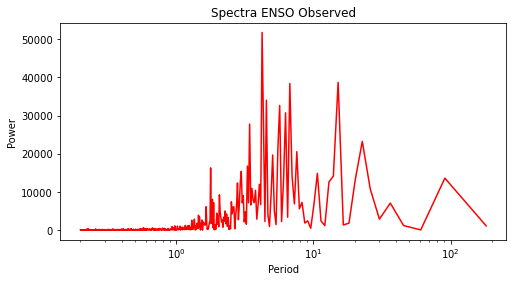

In [14]:
##Spectra calculation and plotting for Observed Data ENSO

yo = fft(datae.ENSO)
qo = len(yo)
po = np.array(qo)

powero = np.power((yo[0:math.floor(po/2)]), 2)
nyquist = 1/(0.2)
freqo = nyquist*np.linspace(0,1,int(po/2))
periodo = 1/(freqo)

plt.subplots(figsize=(8,4), facecolor='white')
plt.title('Spectra ENSO Observed')
plt.semilogx(periodo, np.abs(powero), 'r')
plt.xlabel('Period')
plt.ylabel('Power')
plt.show()

             t       t+1       t+5      t+15
t     1.000000  0.096616 -0.066115 -0.096783
t+1   0.096616  1.000000  0.657899  0.552753
t+5  -0.066115  0.657899  1.000000  0.924221
t+15 -0.096783  0.552753  0.924221  1.000000


count    1819.000000
mean       -0.038730
std         0.771678
min        -2.440570
25%        -0.560794
50%        -0.090595
75%         0.402608
max         2.647340
Name: ENSO, dtype: float64

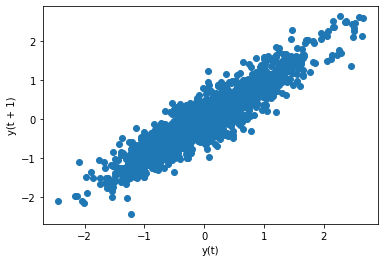

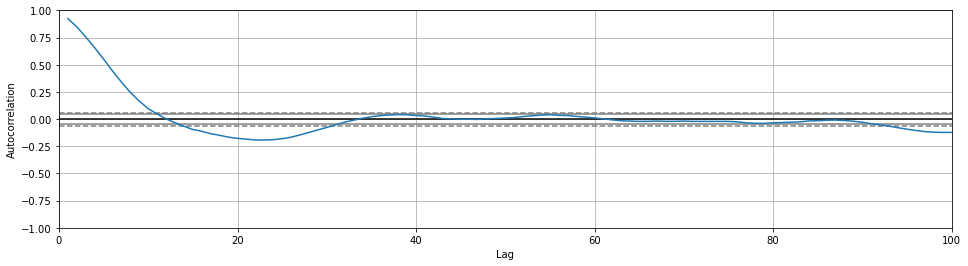

In [15]:
##autocorrelatiton for observed enso

#as lagplot
pd.plotting.lag_plot(datae, lag=1)

#as autocorrelation matrix
ensoc = pd.concat([datae.shift(15), datae.shift(5),
                       datae.shift(1), datae], axis=1)
ensoc.columns = ['t', 't+1', 't+5', 't+15']
correo = ensoc.corr()
 
print(correo)

#as pandas plot
plt.subplots(figsize=(16,4), facecolor='white')
oe = pd.plotting.autocorrelation_plot(datae)
oe.plot()
plt.xlim(0, 100)

#print first order stats
datae['ENSO'].describe()

Float64Index([19000101.0, 19000201.0, 19000301.0, 19000401.0, 19000501.0,
              19000601.0, 19000701.0, 19000801.0, 19000901.0, 19001001.0,
              ...
              20201101.0, 20201201.0, 20210101.0, 20210201.0, 20210301.0,
              20210401.0, 20210501.0, 20210601.0, 20210701.0, 20210801.0],
             dtype='float64', name='T', length=1460)


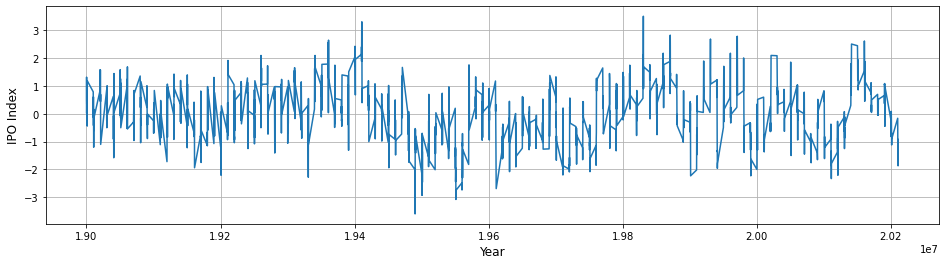

In [16]:
## Import and Plot pdo data from WMO

ipo_data = 'ipdo.dat.txt'
IPO = np.genfromtxt(ipo_data, missing_values=' ')

datap = pd.DataFrame(IPO)
datap.columns = ['T', 'IPO']
datap = datap.set_index('T')

print(datap.index)
labels = ['1900', '1920', '1940', '1960', '1980', '2000', '2020']

plt.subplots(figsize=(16,4), facecolor='white')
plt.plot(datap.index, datap.IPO)
plt.xlabel('Year',fontsize=12)
plt.ylabel('IPO Index',fontsize=12)
plt.grid()

C:\Users\nym\AppData\Local\Temp/ipykernel_8128/3766656636.py:10: RuntimeWarning: divide by zero encountered in true_divide
  periodi = 1/(freqi)


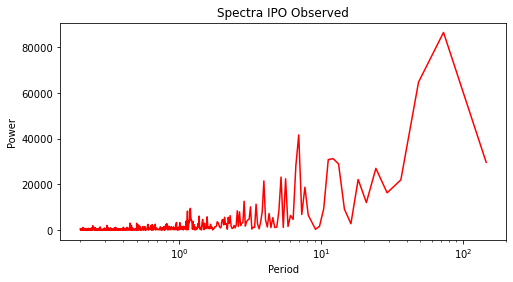

In [17]:
##Spectra calculation and plotting for Observed Data IPO

yi = fft(datap.IPO)
qi = len(yi)
pi = np.array(qi)

poweri = np.power((yi[0:math.floor(pi/2)]), 2)
nyquist = 1/(0.2)
freqi = nyquist*np.linspace(0,1,int(pi/2))
periodi = 1/(freqi)

plt.subplots(figsize=(8,4), facecolor='white')
plt.title('Spectra IPO Observed')
plt.semilogx(periodi, np.abs(poweri), 'r')
plt.xlabel('Period')
plt.ylabel('Power')
plt.show()

             t       t+1       t+5      t+15
t     1.000000  0.364512  0.261681  0.241635
t+1   0.364512  1.000000  0.514294  0.472479
t+5   0.261681  0.514294  1.000000  0.765407
t+15  0.241635  0.472479  0.765407  1.000000


count    1460.000000
mean        0.040137
std         1.033887
min        -3.600000
25%        -0.660000
50%         0.060000
75%         0.740000
max         3.510000
Name: IPO, dtype: float64

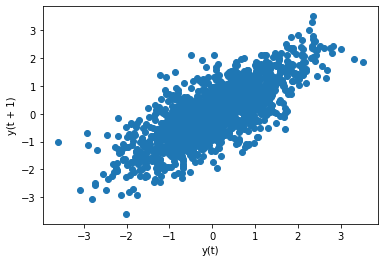

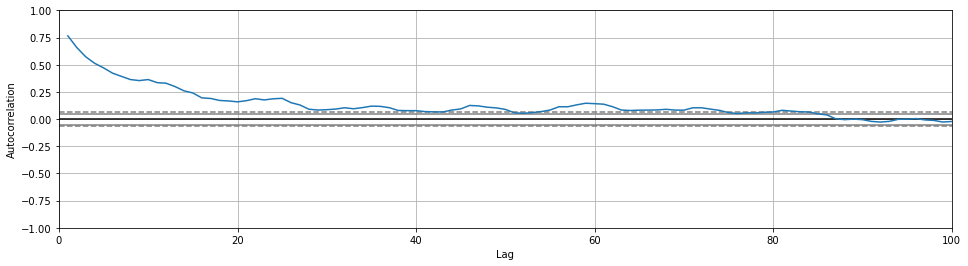

In [18]:
##autocorrelatiton for observed ipo

#as lagplot
pd.plotting.lag_plot(datap, lag=1)

#as autocorrelation matrix
ipoc = pd.concat([datap.shift(15), datap.shift(5),
                       datap.shift(1), datap], axis=1)
ipoc.columns = ['t', 't+1', 't+5', 't+15']
correi = ipoc.corr()
 
print(correi)

#as pandas plot
plt.subplots(figsize=(16,4), facecolor='white')
oi = pd.plotting.autocorrelation_plot(datap)
oi.plot()
plt.xlim(0, 100)

#print first order stats
datap['IPO'].describe()

In [34]:
datap = pd.DataFrame(IPO)
datap.columns = ['T', 'IPO']
datap = datap.set_index('T')


datae = pd.DataFrame(ENSO)
datae.columns = ['T', 'ENSO']
datae = datae.set_index('T')

comp = pd.merge(datae, datap, on='T', how='outer')
comp.columns = ['ENSO', 'IPO']
print(comp.describe())

comp_array = comp.to_numpy()




## Calculate composites

# Positive ENSO, positive IPO
ope_opi = 0
for ii in range (3000, 3279):
    if comp_array[ii,0] >= (np.mean(comp.ENSO) + np.std(comp.ENSO)): continue
    elif comp_array[ii, 1] >= (np.mean(comp.IPO) + np.std(comp.IPO)):
            ope_opi += 1
print(ope_opi)

# Positive ENSO, negative IPO
ope_oni = 0
for ii in range (3000, 3279):
    if comp_array[ii, 0] >= (np.mean(comp.ENSO) + np.std(comp.ENSO)): continue
    elif comp_array[ii, 1] <= (np.mean(comp.IPO) - np.std(comp.IPO)):
            ope_oni += 1
print(ope_oni)

# Negative ENSO, positive IPO
one_opi = 0
for ii in range (3000, 3279):
    if comp_array[ii, 0] <= (np.mean(comp.ENSO) - np.std(comp.ENSO)): continue
    elif comp_array[ii, 1] >= (np.mean(comp.IPO) + np.std(comp.IPO)):
        one_opi += 1
print(one_opi)


# Negative ENSO, negative IPO
one_oni = 0
for ii in range (3000, 3279):
    if comp_array[ii, 0] <= (np.mean(comp.ENSO) - np.std(comp.ENSO)): continue
    elif comp_array[ii, 1] <= (np.mean(comp.IPO) - np.std(comp.IPO)):
        one_oni += 1
print(one_oni)

print(comp_array)

              ENSO          IPO
count  1819.000000  1460.000000
mean     -0.038730     0.040137
std       0.771678     1.033887
min      -2.440570    -3.600000
25%      -0.560794    -0.660000
50%      -0.090595     0.060000
75%       0.402608     0.740000
max       2.647340     3.510000
36
56
36
56
[[-0.960789       nan]
 [-1.18087        nan]
 [-0.77055        nan]
 ...
 [      nan -1.18    ]
 [      nan -1.87    ]
 [      nan -1.12    ]]
